In [2]:
import pandas as pd
import geopandas as gpd
#truck routes
scl = gpd.read_file('data/NYC Street Centerline (CSCL).geojson')
scl

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29T00:00:00+00:00,64,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,1,66,None,42,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29T00:00:00+00:00,82,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,1,84,None,42,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29T00:00:00+00:00,98,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,1,None,None,42,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,1,None,None,24,10004,None,None,PL,212262395,None,...,C,1,TF,None,BATTERY PL,14,BATTERY,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120167,6,None,None,0,10475,None,None,PATH,0,None,...,None,2,NV,None,CO-OP CITY PEDESTRIAN PATH,192222,COOP CITY PEDESTRIAN,2021-06-04T00:00:00+00:00,None,"MULTILINESTRING ((-73.82562 40.87750, -73.8251..."
120168,6,None,None,0,10475,None,None,PATH,0,None,...,None,2,NV,None,CO-OP CITY PEDESTRIAN PATH,192223,COOP CITY PEDESTRIAN,2021-06-04T00:00:00+00:00,None,"MULTILINESTRING ((-73.82562 40.87750, -73.8254..."
120169,1,None,None,45,10454,None,2,AVE,1322600287,TF,...,C,2,TF,None,3 AVE,192224,THIRD,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-73.92931 40.80948, -73.9292..."
120170,1,None,None,45,10454,None,2,AVE,1322600287,TF,...,C,2,TF,None,3 AVE,192226,THIRD,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-73.92936 40.80944, -73.9293..."


In [322]:
import pandas as pd
import geopandas as gpd

#traffic volume csv
traffic=pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/capstone_project/master/data/Traffic_Volume_Counts__2014-2019_.csv')
traffic.head(5)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


In [23]:
scl.dtypes

rw_type         object
l_low_hn        object
pre_direct      object
st_width        object
r_zip           object
r_low_hn        object
bike_lane       object
post_type       object
r_blkfc_id      object
bike_trafd      object
frm_lvl_co      object
post_modif      object
pre_type        object
full_stree      object
l_blkfc_id      object
shape_leng      object
to_lvl_co       object
modified        object
status          object
post_direc      object
r_high_hn       object
l_zip           object
snow_pri        object
borocode        object
trafdir         object
pre_modifi      object
st_label        object
physicalid      object
st_name         object
created         object
l_high_hn       object
geometry      geometry
dtype: object

### Fix difference on street names

In [3]:
scl['st_label'] = scl['st_label'].str.lower()
scl.head(10)

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42,10280,51,None,PL,1222601917,None,...,C,1,TW,None,battery pl,3,BATTERY,2007-11-29T00:00:00+00:00,64,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,1,66,None,42,10280,65,None,PL,1222604562,None,...,C,1,TW,None,battery pl,5,BATTERY,2007-11-29T00:00:00+00:00,82,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,1,84,None,42,10280,83,None,PL,1222600933,None,...,C,1,TW,None,battery pl,6,BATTERY,2007-11-29T00:00:00+00:00,98,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,1,None,None,42,10280,None,None,PL,1222600931,None,...,C,1,TW,None,battery pl,8,BATTERY,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,1,None,None,24,10004,None,None,PL,212262395,None,...,C,1,TF,None,battery pl,14,BATTERY,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."
5,1,300,W,38,10280,301,None,ST,1222607193,None,...,H,1,TW,None,w thames st,23,THAMES,2007-11-29T00:00:00+00:00,398,"MULTILINESTRING ((-74.01740 40.70846, -74.0181..."
6,1,200,W,60,10280,201,None,ST,1222602788,None,...,C,1,TW,None,w thames st,24,THAMES,2007-11-29T00:00:00+00:00,298,"MULTILINESTRING ((-74.01663 40.70813, -74.0174..."
7,1,136,W,60,10280,137,None,ST,1222602788,None,...,C,1,TW,None,w thames st,25,THAMES,2007-11-29T00:00:00+00:00,198,"MULTILINESTRING ((-74.01617 40.70790, -74.0166..."
8,1,None,None,34,10280,None,None,PL,1222601914,None,...,C,1,FT,None,1 pl,29,FIRST,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01700 40.70580, -74.0179..."
9,6,None,None,0,10280,None,None,PL,0,None,...,None,1,NV,None,1 pl,30,FIRST,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01793 40.70617, -74.0186..."


In [323]:
traffic['Roadway Name'] = traffic['Roadway Name'].str.lower()
traffic['From'] = traffic['From'].str.lower()
traffic['To'] = traffic['To'].str.lower()
traffic.head(5)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 avenue,east 154 street,east 155 street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 avenue,east 155 street,east 154 street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,bedford park boulevard,grand concourse,valentine avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,bedford park boulevard,grand concourse,valentine avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,broadway,west 242 street,240 street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


In [324]:
traffic['Roadway Name'] = traffic['Roadway Name'].str.replace('east ', 'e ') 
traffic['From'] = traffic['From'].str.replace('east ', 'e ') 
traffic['To'] = traffic['To'].str.replace('east ', 'e ') 
traffic['Roadway Name'] = traffic['Roadway Name'].str.replace('west ', 'w ') 
traffic['From'] = traffic['From'].str.replace('west ', 'w ') 
traffic['To'] = traffic['To'].str.replace('west ', 'w ') 

In [4]:
from fuzzywuzzy import fuzz

scl['st_label'] = scl['st_label'].str.replace(' blvd', ' boulevard') 
scl['st_label'] = scl['st_label'].str.replace(' e ', 'east ') 
scl['st_label'] = scl['st_label'].str.replace(' w ', 'west ') 
scl['st_label'] = scl['st_label'].str.replace(' pkwy', ' parkway') 
scl['st_label'] = scl['st_label'].str.replace(' pl', ' place') 
scl['st_label'] = scl['st_label'].str.replace(' st', ' street') 
scl['st_label'] = scl['st_label'].str.replace(' rd', ' road')
scl['st_label'] = scl['st_label'].str.replace(' ave', ' avenue')
scl['st_label'] = scl['st_label'].str.replace('ave ', 'avenue ')
scl['st_label'] = scl['st_label'].str.replace(' ln', ' lane')
scl['st_label'] = scl['st_label'].str.replace(' dvwy', ' driveway')
scl['st_label'] = scl['st_label'].str.replace(' dr', ' drive')
scl['st_label'] = scl['st_label'].str.replace(' expy', ' expresspway')
scl['st_label'] = scl['st_label'].str.replace(' tunl', ' tunnel')
scl['st_label'] = scl['st_label'].str.replace(' brg', ' bridge')
scl['st_label'] = scl['st_label'].str.replace(' sq', ' square')
scl['st_label'] = scl['st_label'].str.replace(' plz', ' plaza')
scl['st_label'] = scl['st_label'].str.replace(' cir', ' circle')
scl['st_label'] = scl['st_label'].str.replace(' tpke', ' turnpike')
scl['st_label'] = scl['st_label'].str.replace(' cres', ' crescent')
scl['st_label'] = scl['st_label'].str.replace(' fwy', ' freeway')
scl['st_label'] = scl['st_label'].str.replace(' appr ', ' approach')
scl['st_label'] = scl['st_label'].str.replace(' lk', ' lake')
scl['st_label'] = scl['st_label'].str.replace(' hwy', ' highway')
scl['st_label'] = scl['st_label'].str.replace(' hts', ' heights')
scl['st_label'] = scl['st_label'].str.replace(' grn', ' green')
scl['st_label'] = scl['st_label'].str.replace(' pth', ' path')
scl['st_label'] = scl['st_label'].str.replace(' drwy', ' driveway')
scl['st_label'] = scl['st_label'].str.replace(' rdg', ' ridge')
scl.head(10)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42,10280,51,None,PL,1222601917,None,...,C,1,TW,None,battery place,3,BATTERY,2007-11-29T00:00:00+00:00,64,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,1,66,None,42,10280,65,None,PL,1222604562,None,...,C,1,TW,None,battery place,5,BATTERY,2007-11-29T00:00:00+00:00,82,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,1,84,None,42,10280,83,None,PL,1222600933,None,...,C,1,TW,None,battery place,6,BATTERY,2007-11-29T00:00:00+00:00,98,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,1,None,None,42,10280,None,None,PL,1222600931,None,...,C,1,TW,None,battery place,8,BATTERY,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,1,None,None,24,10004,None,None,PL,212262395,None,...,C,1,TF,None,battery place,14,BATTERY,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."
5,1,300,W,38,10280,301,None,ST,1222607193,None,...,H,1,TW,None,w thames street,23,THAMES,2007-11-29T00:00:00+00:00,398,"MULTILINESTRING ((-74.01740 40.70846, -74.0181..."
6,1,200,W,60,10280,201,None,ST,1222602788,None,...,C,1,TW,None,w thames street,24,THAMES,2007-11-29T00:00:00+00:00,298,"MULTILINESTRING ((-74.01663 40.70813, -74.0174..."
7,1,136,W,60,10280,137,None,ST,1222602788,None,...,C,1,TW,None,w thames street,25,THAMES,2007-11-29T00:00:00+00:00,198,"MULTILINESTRING ((-74.01617 40.70790, -74.0166..."
8,1,None,None,34,10280,None,None,PL,1222601914,None,...,C,1,FT,None,1 place,29,FIRST,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01700 40.70580, -74.0179..."
9,6,None,None,0,10280,None,None,PL,0,None,...,None,1,NV,None,1 place,30,FIRST,2007-11-29T00:00:00+00:00,None,"MULTILINESTRING ((-74.01793 40.70617, -74.0186..."


In [5]:
geom_df = scl[['st_label' , 'geometry'] ]
geom_df.head(3)

,st_label,geometry
0,battery place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,battery place,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,battery place,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."


### Get surrounding streets from geojson 

In [134]:
test= geom_df.loc[:100]

In [132]:
gdf1= geom_df.loc[10000:20000]
gdf2 = geom_df.loc[20000:30000]
gdf3 = geom_df.loc[30000:40000]
gdf4 = geom_df.loc[40000:50000]
gdf5 = geom_df.loc[50000:60000]
gdf6 = geom_df.loc[60000:70000]
gdf7 = geom_df.loc[70000:80000]
gdf8 = geom_df.loc[80000:90000]
gdf9 = geom_df.loc[90000:100000]
gdf10 = geom_df.loc[100000:110000]
gdf11 = geom_df.loc[110000:120172]

In [161]:
# add NEIGHBORS column
gdf["NEIGHBORS"] = None 

for index, street in gdf.iterrows():
    neighbors = gdf[gdf.geometry.touches(street['geometry'])].st_label.tolist()
    neighbors = [ name for name in neighbors if street.st_label != name ]
    neighbor = list(set(neighbors))
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf.to_file("streets2.geojson", driver='GeoJSON')



In [114]:
gdf.head(10)

,st_label,geometry,NEIGHBORS
0,battery place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178...",1 place
1,battery place,"MULTILINESTRING ((-74.01757 40.70684, -74.0171...",
2,battery place,"MULTILINESTRING ((-74.01712 40.70746, -74.0166...",w thames street
3,battery place,"MULTILINESTRING ((-74.01694 40.70481, -74.0170...",
4,battery place,"MULTILINESTRING ((-74.01429 40.70455, -74.0143...",state street
5,w thames street,"MULTILINESTRING ((-74.01740 40.70846, -74.0181...",
6,w thames street,"MULTILINESTRING ((-74.01663 40.70813, -74.0174...",battery place
7,w thames street,"MULTILINESTRING ((-74.01617 40.70790, -74.0166...",battery place
8,1 place,"MULTILINESTRING ((-74.01700 40.70580, -74.0179...",battery place
9,1 place,"MULTILINESTRING ((-74.01793 40.70617, -74.0186...",battery place


In [20]:
# add NEIGHBORS column
gdf3["NEIGHBORS"] = None 

for index, street in gdf2.iterrows():  
    neighbors = gdf2[gdf2.geometry.touches(street['geometry'])].st_label.tolist()
    neighbors = [ name for name in neighbors if street.st_label != name ]
    neighbor = list(set(neighbors))
    gdf2.at[index, "NEIGHBORS"] = ", ".join(neighbors)
    # save GeoDataFrame as a new file
st.to_file("streets.geojson", driver='GeoJSON')



In [201]:
st = pd.concat([gdf, gdf1, gdf2, gdf3, gdf4, gdf5, gdf6, gdf7, gdf8, gdf9, gdf10, gdf11])
st.head(3)

,st_label,geometry,NEIGHBORS
0,battery place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178...",1 place
1,battery place,"MULTILINESTRING ((-74.01757 40.70684, -74.0171...",
2,battery place,"MULTILINESTRING ((-74.01712 40.70746, -74.0166...",w thames street


In [202]:
st['NEIGHBORS']= st['NEIGHBORS'].replace('""', '-')

In [203]:
# new data frame with split value columns
new = st["NEIGHBORS"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
st["To"]= new[0]
  
# making separate last name column from new data frame
st["From"]= new[1]
  
# Dropping old Name columns
st.drop(columns =["NEIGHBORS"], inplace = True)
  
# df display
st.head(15)

,st_label,geometry,To,From
0,battery place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178...",1 place,None
1,battery place,"MULTILINESTRING ((-74.01757 40.70684, -74.0171...",,None
2,battery place,"MULTILINESTRING ((-74.01712 40.70746, -74.0166...",w thames street,None
3,battery place,"MULTILINESTRING ((-74.01694 40.70481, -74.0170...",,None
4,battery place,"MULTILINESTRING ((-74.01429 40.70455, -74.0143...",state street,None
5,w thames street,"MULTILINESTRING ((-74.01740 40.70846, -74.0181...",,None
6,w thames street,"MULTILINESTRING ((-74.01663 40.70813, -74.0174...",battery place,None
7,w thames street,"MULTILINESTRING ((-74.01617 40.70790, -74.0166...",battery place,None
8,1 place,"MULTILINESTRING ((-74.01700 40.70580, -74.0179...",battery place,None
9,1 place,"MULTILINESTRING ((-74.01793 40.70617, -74.0186...",battery place,None


In [226]:
st.rename(columns={"st_label": "Roadway Name"} , inplace = True)

### Join Geographic Data to Traffic Volumes

In [422]:
test4 = traffic.merge(st, how='inner', on=['Roadway Name','To'])
test4

,ID,Segment ID,Roadway Name,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,geometry,From_y
0,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",None
1,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.87015 40.87831, -73.8700...",None
2,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.87048 40.87671, -73.8700...",None
3,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.86997 40.87826, -73.8698...",None
4,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/14/2014,1042.0,736.0,488.0,...,3022,3028,3157,3007,2362,1734,1263,863,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,339,219673,tompkins avenue,dead end,hancock street,SB,10/16/2019,352.0,188.0,108.0,...,1280,1184,1118,976,749,521,661,528,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None
9233,339,219673,tompkins avenue,dead end,hancock street,SB,10/17/2019,296.0,236.0,122.0,...,1204,1429,1037,1204,1033,725,614,577,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None
9234,339,219673,tompkins avenue,dead end,hancock street,SB,10/18/2019,495.0,362.0,191.0,...,1403,1446,1404,1057,1120,1146,922,750,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None
9235,339,219673,tompkins avenue,dead end,hancock street,SB,10/19/2019,761.0,578.0,413.0,...,1180,1094,1108,998,1212,841,952,973,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None


In [389]:
test5 = closed1.merge(st, how='inner', on=['Roadway Name','To'])
test5

,ID,Segment ID,Roadway Name,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,midday,afternoon_rush,evening,night,total,year,month,day,geometry,From_y
0,221,70220,melrose avenue,e 154 street,e 153 street,SB,2014-09-16,117.0,61.0,57.0,...,1158.0,1349,817.0,293.0,5507.0,2014,9,16,"MULTILINESTRING ((-73.91650 40.81888, -73.9162...",None
1,259,7453,richmond road,rockland avenue,morley avenue,SB,2014-10-01,114.0,58.0,39.0,...,3227.0,3448,486.0,263.0,9583.0,2014,10,1,"MULTILINESTRING ((-74.12516 40.57588, -74.1253...",None
2,259,7453,richmond road,rockland avenue,morley avenue,SB,2014-10-01,114.0,58.0,39.0,...,3227.0,3448,486.0,263.0,9583.0,2014,10,1,"MULTILINESTRING ((-74.12535 40.57590, -74.1256...",None
3,242,78481,prospect avenue,jennings street,e 170 street,SB,2014-10-04,63.0,44.0,41.0,...,902.0,439,599.0,187.0,2566.0,2014,10,4,"MULTILINESTRING ((-73.89669 40.83197, -73.8964...",None
4,4,32780,4 avenue,e 11 street,e 12 street,NB,2014-10-08,165.0,144.0,179.0,...,5062.0,4122,2395.0,2184.0,17487.0,2014,10,8,"MULTILINESTRING ((-73.99021 40.73200, -73.9901...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,49,28262,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,0.0,0.0,0.0,...,2964.0,2719,1850.0,1.0,7644.0,2017,11,17,"MULTILINESTRING ((-73.96141 40.65217, -73.9611...",None
148,49,28262,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,0.0,0.0,0.0,...,2964.0,2719,1850.0,1.0,7644.0,2017,11,17,"MULTILINESTRING ((-73.96160 40.65317, -73.9614...",None
149,335,33850,9 avenue,w 46 street,w 47 street,SB,2018-03-11,1869.0,1591.0,0.0,...,8642.0,6999,8282.0,4859.0,33042.0,2018,3,11,"MULTILINESTRING ((-73.99032 40.76161, -73.9898...",None
150,292,28298,ocean avenue,newkirk avenue,foster avenue,NB,2019-10-15,0.0,90.0,68.0,...,4940.0,4260,1747.0,729.0,17904.0,2019,10,15,"MULTILINESTRING ((-73.95867 40.63777, -73.9584...",None


In [423]:
test4 = test4[test4['geometry'].notna()]
test4

,ID,Segment ID,Roadway Name,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,geometry,From_y
0,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",None
1,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.87015 40.87831, -73.8700...",None
2,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.87048 40.87671, -73.8700...",None
3,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/13/2014,802.0,445.0,388.0,...,2699,2877,2947,2532,2193,1820,1677,1331,"MULTILINESTRING ((-73.86997 40.87826, -73.8698...",None
4,71,139620,bronx river parkway,bronx river,e gun hill road,NB,09/14/2014,1042.0,736.0,488.0,...,3022,3028,3157,3007,2362,1734,1263,863,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,339,219673,tompkins avenue,dead end,hancock street,SB,10/16/2019,352.0,188.0,108.0,...,1280,1184,1118,976,749,521,661,528,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None
9233,339,219673,tompkins avenue,dead end,hancock street,SB,10/17/2019,296.0,236.0,122.0,...,1204,1429,1037,1204,1033,725,614,577,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None
9234,339,219673,tompkins avenue,dead end,hancock street,SB,10/18/2019,495.0,362.0,191.0,...,1403,1446,1404,1057,1120,1146,922,750,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None
9235,339,219673,tompkins avenue,dead end,hancock street,SB,10/19/2019,761.0,578.0,413.0,...,1180,1094,1108,998,1212,841,952,973,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None


#### From the traffic volume dataset with 27000 observations, we were able to find 10000 in both datasets.

In [424]:
#handle dates
test4['Date']=pd.to_datetime(test4.Date, format="%m/%d/%Y")
test4['year'] = test4['Date'].dt.year

test4['month'] = test4['Date'].dt.month

test4['day'] = test4['Date'].dt.day


In [381]:
#handle dates
closed1['Date']=pd.to_datetime(closed1.Date, format="%m/%d/%Y")
closed1['year'] = closed1['Date'].dt.year

closed1['month'] = closed1['Date'].dt.month

closed1['day'] = closed1['Date'].dt.day

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying

In [373]:
closed1 = traffic.loc[(traffic['6:00-7:00AM'] ==0 )| 
            (traffic['7:00-8:00AM'] ==0 )|
            (traffic['8:00-9:00AM'] ==0)|
            (traffic['9:00-10:00AM'] ==0)|
            (traffic['10:00-11:00AM'] ==0)|
            (traffic['11:00-12:00PM'] ==0)|
            (traffic['12:00-1:00PM'] ==0)|
            (traffic['1:00-2:00PM'] ==0)|
            (traffic['2:00-3:00PM'] ==0)|
            (traffic['3:00-4:00PM'] ==0)|
            (traffic['4:00-5:00PM'] ==0)|
            (traffic['5:00-6:00PM'] ==0)|
            (traffic['6:00-7:00PM'] ==0)|
            (traffic['7:00-8:00PM'] ==0)|
            (traffic['8:00-9:00PM'] ==0)|
            (traffic['9:00-10:00PM'] ==0)|
            (traffic['10:00-11:00PM'] ==0)|
            (traffic['11:00-12:00PM'] ==0)|
            (traffic['12:00-1:00 AM'] ==0)|
            (traffic['1:00-2:00AM'] ==0)|
            (traffic['2:00-3:00AM'] ==0)|
            (traffic['3:00-4:00AM'] ==0)|
            (traffic['4:00-5:00AM'] ==0)|
            (traffic['5:00-6:00AM'] ==0)]

In [419]:
traffic = traffic.dropna()

In [425]:
#handle dimensionality
test4['morning_rush'] = traffic['6:00-7:00AM'] + traffic['7:00-8:00AM'] + traffic['8:00-9:00AM'] + traffic['9:00-10:00AM'] + traffic['10:00-11:00AM']
test4['midday'] = traffic['11:00-12:00PM'] + traffic['12:00-1:00PM'] + traffic['1:00-2:00PM'] + traffic['2:00-3:00PM'] + traffic['3:00-4:00PM']
test4['afternoon_rush'] = traffic['4:00-5:00PM'] + traffic['5:00-6:00PM'] + traffic['6:00-7:00PM'] + traffic['7:00-8:00PM']
test4['evening'] = traffic['8:00-9:00PM'] + traffic['9:00-10:00PM'] + traffic['10:00-11:00PM'] + traffic['11:00-12:00AM'] + traffic['12:00-1:00 AM']
test4['night'] = traffic['1:00-2:00AM'] + traffic['2:00-3:00AM'] + traffic['3:00-4:00AM'] + traffic['4:00-5:00AM'] + traffic['5:00-6:00AM'] 

test4

,ID,Segment ID,Roadway Name,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,geometry,From_y,year,month,day,morning_rush,midday,afternoon_rush,evening,night
0,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",None,2014,9,13,1182.0,2489.0,2229.0,1486.0,711.0
1,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,"MULTILINESTRING ((-73.87015 40.87831, -73.8700...",None,2014,9,13,1188.0,1897.0,1444.0,1097.0,585.0
2,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,"MULTILINESTRING ((-73.87048 40.87671, -73.8700...",None,2014,9,13,739.0,1274.0,903.0,726.0,336.0
3,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,"MULTILINESTRING ((-73.86997 40.87826, -73.8698...",None,2014,9,13,828.0,1252.0,878.0,696.0,349.0
4,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-14,1042.0,736.0,488.0,...,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",None,2014,9,14,2227.0,3886.0,2579.0,2015.0,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-16,352.0,188.0,108.0,...,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None,2019,10,16,2803.0,2519.0,2064.0,858.0,228.0
9233,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-17,296.0,236.0,122.0,...,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None,2019,10,17,2003.0,2202.0,1974.0,738.0,130.0
9234,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-18,495.0,362.0,191.0,...,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None,2019,10,18,4114.0,5120.0,4797.0,2008.0,381.0
9235,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-19,761.0,578.0,413.0,...,"MULTILINESTRING ((-73.94389 40.68324, -73.9437...",None,2019,10,19,5285.0,4024.0,3560.0,1707.0,546.0


In [426]:
test4['total'] = test4['morning_rush'] + test4['midday']+test4['afternoon_rush']+test4['evening']+test4['night']
test4

,ID,Segment ID,Roadway Name,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,From_y,year,month,day,morning_rush,midday,afternoon_rush,evening,night,total
0,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,None,2014,9,13,1182.0,2489.0,2229.0,1486.0,711.0,8097.0
1,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,None,2014,9,13,1188.0,1897.0,1444.0,1097.0,585.0,6211.0
2,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,None,2014,9,13,739.0,1274.0,903.0,726.0,336.0,3978.0
3,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,None,2014,9,13,828.0,1252.0,878.0,696.0,349.0,4003.0
4,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-14,1042.0,736.0,488.0,...,None,2014,9,14,2227.0,3886.0,2579.0,2015.0,770.0,11477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-16,352.0,188.0,108.0,...,None,2019,10,16,2803.0,2519.0,2064.0,858.0,228.0,8472.0
9233,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-17,296.0,236.0,122.0,...,None,2019,10,17,2003.0,2202.0,1974.0,738.0,130.0,7047.0
9234,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-18,495.0,362.0,191.0,...,None,2019,10,18,4114.0,5120.0,4797.0,2008.0,381.0,16420.0
9235,339,219673,tompkins avenue,dead end,hancock street,SB,2019-10-19,761.0,578.0,413.0,...,None,2019,10,19,5285.0,4024.0,3560.0,1707.0,546.0,15122.0


In [388]:
#handle dimensionality
closed1['morning_rush'] = traffic['6:00-7:00AM'] + traffic['7:00-8:00AM'] + traffic['8:00-9:00AM'] + traffic['9:00-10:00AM'] + traffic['10:00-11:00AM']
closed1['midday'] = traffic['11:00-12:00PM'] + traffic['12:00-1:00PM'] + traffic['1:00-2:00PM'] + traffic['2:00-3:00PM'] + traffic['3:00-4:00PM']
closed1['afternoon_rush'] = traffic['4:00-5:00PM'] + traffic['5:00-6:00PM'] + traffic['6:00-7:00PM'] + traffic['7:00-8:00PM']
closed1['evening'] = traffic['8:00-9:00PM'] + traffic['9:00-10:00PM'] + traffic['10:00-11:00PM'] + traffic['11:00-12:00AM'] + traffic['12:00-1:00 AM']
closed1['night'] = traffic['1:00-2:00AM'] + traffic['2:00-3:00AM'] + traffic['3:00-4:00AM'] + traffic['4:00-5:00AM'] + traffic['5:00-6:00AM'] 
closed1['total'] = closed1['morning_rush'] + closed1['midday']+closed1['afternoon_rush']+closed1['evening']+closed1['night']
closed1

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,11:00-12:00AM,morning_rush,midday,afternoon_rush,evening,night,total,year,month,day
81,76,70364,brook avenue,e 152 street,e 153 street,SB,2014-09-14,89.0,70.0,65.0,...,64,435.0,985.0,268,522.0,256.0,2466.0,2014,9,14
158,367,60160,110 avenue,155 street,156 street,EB,2016-02-27,0.0,0.0,0.0,...,79,0.0,758.0,591,406.0,0.0,1755.0,2016,2,27
253,367,60160,110 avenue,155 street,156 street,WB,2016-02-27,0.0,0.0,0.0,...,106,0.0,1019.0,805,488.0,0.0,2312.0,2016,2,27
261,221,70220,melrose avenue,e 154 street,e 153 street,SB,2014-09-16,117.0,61.0,57.0,...,119,1890.0,1158.0,1349,817.0,293.0,5507.0,2014,9,16
268,236,261726,park avenue,138 street,135 street,NB,2014-09-16,41.0,44.0,34.0,...,61,915.0,696.0,1136,320.0,118.0,3185.0,2014,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26124,303,178366,pelham parkway north,dead end,white plains road,WB,2019-11-06,3.0,2.0,0.0,...,1,24.0,38.0,37,20.0,5.0,124.0,2019,11,6
26125,303,178366,pelham parkway north,dead end,white plains road,WB,2019-11-07,5.0,0.0,1.0,...,1,41.0,36.0,35,14.0,7.0,133.0,2019,11,7
26126,303,178366,pelham parkway north,dead end,white plains road,WB,2019-11-08,1.0,2.0,2.0,...,2,25.0,35.0,43,18.0,9.0,130.0,2019,11,8
26127,303,178366,pelham parkway north,dead end,white plains road,WB,2019-11-09,5.0,1.0,0.0,...,2,27.0,49.0,37,31.0,3.0,147.0,2019,11,9


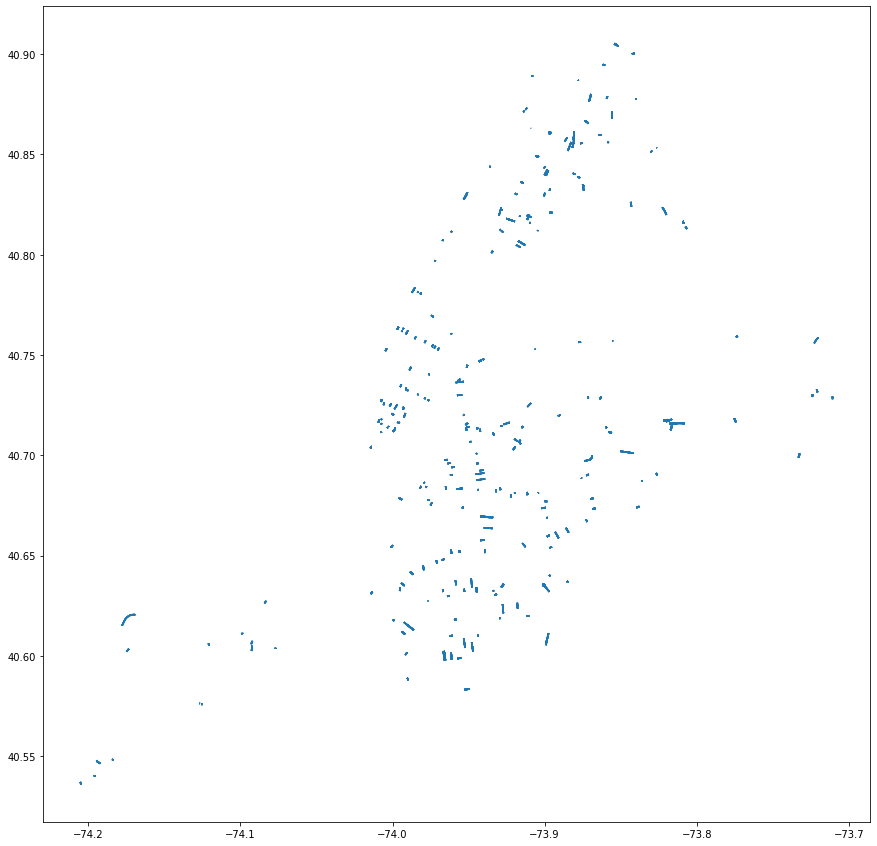

In [427]:
data = test4[['Roadway Name', 'geometry']]
gdata = gpd.GeoDataFrame(data, geometry='geometry')
gdata.plot(figsize=(30, 15))

In [311]:
#traffic volume csv
df=pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/capstone_project/master/closed_streets.csv')
df.head(5)

,Unnamed: 0,NODEID,ONSTREETNAME,FROMSTREETNAME,BOROUGH_CODE,WORK_START_DATE,WORK_END_DATE,PURPOSE,DateTime,DateTimeEnd,Date,Time,year,month,day,DateEnd,difference
0,0,13010,canal avenue,w 17 street,B,05/17/2018 00:00:00,05/21/2018 23:59:59,DOT IN-HOUSE PAVING,2018-05-17 00:00:00,2018-05-21 23:59:59,2018-05-17,23:59:59,2018,5,21,2018-05-21,4 days 23:59:59
1,1,13011,belt parkway eb en cropsey avenue sb,bay 52 street,B,05/17/2018 00:00:00,05/21/2018 23:59:59,DOT IN-HOUSE PAVING,2018-05-17 00:00:00,2018-05-21 23:59:59,2018-05-17,23:59:59,2018,5,21,2018-05-21,4 days 23:59:59
2,2,108018,riverside boulevard,w 63 street,M,12/04/2017 00:00:00,12/05/2017 23:59:59,DOT IN-HOUSE PAVING,2017-12-04 00:00:00,2017-12-05 23:59:59,2017-12-04,23:59:59,2017,12,5,2017-12-05,1 days 23:59:59
3,3,101964,87 avenue,233 street,Q,10/06/2017 14:10:27,01/01/2018 23:58:59,DEP CONTRACTOR MAJOR INSTALLATION WATER,2017-10-06 14:10:27,2018-01-01 23:58:59,2017-10-06,23:58:59,2018,1,1,2018-01-01,87 days 09:48:32
4,4,17361,avenue k,e 7 street,B,07/31/2017 00:00:00,08/02/2017 23:59:59,DOT IN-HOUSE PAVING,2017-07-31 00:00:00,2017-08-02 23:59:59,2017-07-31,23:59:59,2017,8,2,2017-08-02,2 days 23:59:59


In [333]:
df.dtypes

NODEID             int64
ONSTREETNAME      object
FROMSTREETNAME    object
BOROUGH_CODE      object
DateTime          object
DateTimeEnd       object
Date              object
Time              object
year               int64
month              int64
day                int64
DateEnd           object
difference        object
dtype: object

In [313]:
# Dropping old Name columns
df.drop(columns =["Unnamed: 0","WORK_START_DATE","WORK_END_DATE","PURPOSE"], inplace = True)


In [314]:
df.head(3)

,NODEID,ONSTREETNAME,FROMSTREETNAME,BOROUGH_CODE,DateTime,DateTimeEnd,Date,Time,year,month,day,DateEnd,difference
0,13010,canal avenue,w 17 street,B,2018-05-17 00:00:00,2018-05-21 23:59:59,2018-05-17,23:59:59,2018,5,21,2018-05-21,4 days 23:59:59
1,13011,belt parkway eb en cropsey avenue sb,bay 52 street,B,2018-05-17 00:00:00,2018-05-21 23:59:59,2018-05-17,23:59:59,2018,5,21,2018-05-21,4 days 23:59:59
2,108018,riverside boulevard,w 63 street,M,2017-12-04 00:00:00,2017-12-05 23:59:59,2017-12-04,23:59:59,2017,12,5,2017-12-05,1 days 23:59:59


In [436]:
test5.dtypes

ID                         int64
Segment ID                 int64
Roadway Name              object
From_x                    object
To                        object
Direction                 object
Date              datetime64[ns]
12:00-1:00 AM            float64
1:00-2:00AM              float64
2:00-3:00AM              float64
3:00-4:00AM              float64
4:00-5:00AM              float64
5:00-6:00AM              float64
6:00-7:00AM              float64
7:00-8:00AM              float64
8:00-9:00AM              float64
9:00-10:00AM             float64
10:00-11:00AM            float64
11:00-12:00PM            float64
12:00-1:00PM               int64
1:00-2:00PM                int64
2:00-3:00PM                int64
3:00-4:00PM                int64
4:00-5:00PM                int64
5:00-6:00PM                int64
6:00-7:00PM                int64
7:00-8:00PM                int64
8:00-9:00PM                int64
9:00-10:00PM               int64
10:00-11:00PM              int64
11:00-12:0

In [455]:
# date to string
test8["Date"] = test8["Date"].map(lambda ts: ts.strftime("%Y-%m-%d"))

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [431]:
df_final = test4.merge(df, how='inner',left_on=['Roadway Name','Date'], right_on=['ONSTREETNAME','DateEnd'])
df_final = df_final.drop_duplicates()

In [432]:
df_final2 = test4.merge(df, how='inner',left_on=['Roadway Name','Date'], right_on=['FROMSTREETNAME','Date'])
df_final2=df_final2.drop_duplicates()

In [433]:
test6 = pd.concat([df_final, df_final2])

In [434]:
test7 = test6[['ID','Roadway Name','From_x','To','Direction','Date','Date_x','morning_rush','midday',
               'afternoon_rush','evening','night','total','geometry']]
test7

,ID,Roadway Name,From_x,To,Direction,Date,Date_x,morning_rush,midday,afternoon_rush,evening,night,total,geometry
0,322,southern boulevard,dead end,e fordham road,NB,NaN,2019-11-06,2825.0,4037.0,3395.0,3374.0,1611.0,15242.0,"MULTILINESTRING ((-73.88098 40.85760, -73.8810..."
1,322,southern boulevard,dead end,e fordham road,NB,NaN,2019-11-06,3154.0,3801.0,3329.0,3416.0,1700.0,15400.0,"MULTILINESTRING ((-73.88089 40.85724, -73.8809..."
2,322,southern boulevard,dead end,e fordham road,NB,NaN,2019-11-06,711.0,1295.0,1112.0,836.0,380.0,4334.0,"MULTILINESTRING ((-73.88086 40.85708, -73.8808..."
3,322,southern boulevard,dead end,e fordham road,NB,NaN,2019-11-06,1070.0,1770.0,1463.0,1316.0,548.0,6167.0,"MULTILINESTRING ((-73.88071 40.85701, -73.8807..."
4,322,southern boulevard,dead end,e fordham road,NB,NaN,2019-11-06,305.0,404.0,239.0,234.0,84.0,1266.0,"MULTILINESTRING ((-73.88076 40.85717, -73.8808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,287,northern boulevard,oceania street,corporal kennedy street,EB,2019-09-23,NaN,459.0,963.0,824.0,590.0,248.0,3084.0,"MULTILINESTRING ((-73.77423 40.75904, -73.7737..."
37,287,northern boulevard,oceania street,corporal kennedy street,EB,2019-09-23,NaN,711.0,1834.0,1707.0,1267.0,465.0,5984.0,"MULTILINESTRING ((-73.77378 40.75917, -73.7729..."
38,49,49 street,12 avenue,13 avenue,WB,2019-09-25,NaN,855.0,1619.0,1374.0,981.0,353.0,5182.0,"MULTILINESTRING ((-73.99432 40.63635, -73.9921..."
39,247,lexington avenue,e 46 street,e 47 street,SB,2019-10-09,NaN,514.0,951.0,862.0,631.0,286.0,3244.0,"MULTILINESTRING ((-73.97419 40.75399, -73.9737..."


In [480]:
test9 = test4[['ID','Roadway Name','From_x','To','Direction','Date','morning_rush','midday',
               'afternoon_rush','evening','night','total','geometry']]
test9

,ID,Roadway Name,From_x,To,Direction,Date,morning_rush,midday,afternoon_rush,evening,night,total,geometry
0,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,1182.0,2489.0,2229.0,1486.0,711.0,8097.0,"MULTILINESTRING ((-73.87084 40.87631, -73.8707..."
1,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,1188.0,1897.0,1444.0,1097.0,585.0,6211.0,"MULTILINESTRING ((-73.87015 40.87831, -73.8700..."
2,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,739.0,1274.0,903.0,726.0,336.0,3978.0,"MULTILINESTRING ((-73.87048 40.87671, -73.8700..."
3,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,828.0,1252.0,878.0,696.0,349.0,4003.0,"MULTILINESTRING ((-73.86997 40.87826, -73.8698..."
4,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-14,2227.0,3886.0,2579.0,2015.0,770.0,11477.0,"MULTILINESTRING ((-73.87084 40.87631, -73.8707..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,339,tompkins avenue,dead end,hancock street,SB,2019-10-16,2803.0,2519.0,2064.0,858.0,228.0,8472.0,"MULTILINESTRING ((-73.94389 40.68324, -73.9437..."
9233,339,tompkins avenue,dead end,hancock street,SB,2019-10-17,2003.0,2202.0,1974.0,738.0,130.0,7047.0,"MULTILINESTRING ((-73.94389 40.68324, -73.9437..."
9234,339,tompkins avenue,dead end,hancock street,SB,2019-10-18,4114.0,5120.0,4797.0,2008.0,381.0,16420.0,"MULTILINESTRING ((-73.94389 40.68324, -73.9437..."
9235,339,tompkins avenue,dead end,hancock street,SB,2019-10-19,5285.0,4024.0,3560.0,1707.0,546.0,15122.0,"MULTILINESTRING ((-73.94389 40.68324, -73.9437..."


In [437]:
test8 = test5[['ID','Roadway Name','From_x','To','Direction','Date','morning_rush','midday',
               'afternoon_rush','evening','night','total','geometry']]
test8

,ID,Roadway Name,From_x,To,Direction,Date,morning_rush,midday,afternoon_rush,evening,night,total,geometry
0,221,melrose avenue,e 154 street,e 153 street,SB,2014-09-16,1890.0,1158.0,1349,817.0,293.0,5507.0,"MULTILINESTRING ((-73.91650 40.81888, -73.9162..."
1,259,richmond road,rockland avenue,morley avenue,SB,2014-10-01,2159.0,3227.0,3448,486.0,263.0,9583.0,"MULTILINESTRING ((-74.12516 40.57588, -74.1253..."
2,259,richmond road,rockland avenue,morley avenue,SB,2014-10-01,2159.0,3227.0,3448,486.0,263.0,9583.0,"MULTILINESTRING ((-74.12535 40.57590, -74.1256..."
3,242,prospect avenue,jennings street,e 170 street,SB,2014-10-04,439.0,902.0,439,599.0,187.0,2566.0,"MULTILINESTRING ((-73.89669 40.83197, -73.8964..."
4,4,4 avenue,e 11 street,e 12 street,NB,2014-10-08,3724.0,5062.0,4122,2395.0,2184.0,17487.0,"MULTILINESTRING ((-73.99021 40.73200, -73.9901..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,49,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,110.0,2964.0,2719,1850.0,1.0,7644.0,"MULTILINESTRING ((-73.96141 40.65217, -73.9611..."
148,49,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,110.0,2964.0,2719,1850.0,1.0,7644.0,"MULTILINESTRING ((-73.96160 40.65317, -73.9614..."
149,335,9 avenue,w 46 street,w 47 street,SB,2018-03-11,4260.0,8642.0,6999,8282.0,4859.0,33042.0,"MULTILINESTRING ((-73.99032 40.76161, -73.9898..."
150,292,ocean avenue,newkirk avenue,foster avenue,NB,2019-10-15,6228.0,4940.0,4260,1747.0,729.0,17904.0,"MULTILINESTRING ((-73.95867 40.63777, -73.9584..."


In [445]:
test7 = test7.Date.fillna(test7.Date_x, inplace=True)
del test7['Date_x']
test7

AttributeError: 'DataFrame' object has no attribute 'Date_x'

In [454]:
test8.dtypes

ID                   int64
Roadway Name        object
From_x              object
To                  object
Direction           object
Date                object
morning_rush       float64
midday             float64
afternoon_rush     float64
evening            float64
night              float64
total              float64
geometry          geometry
dtype: object

In [499]:
final_df = pd.concat([test7, test8])
final_df

,ID,Roadway Name,From_x,To,Direction,Date,morning_rush,midday,afternoon_rush,evening,night,total,geometry
0,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,2825.0,4037.0,3395.0,3374.0,1611.0,15242.0,"MULTILINESTRING ((-73.88098 40.85760, -73.8810..."
1,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,3154.0,3801.0,3329.0,3416.0,1700.0,15400.0,"MULTILINESTRING ((-73.88089 40.85724, -73.8809..."
2,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,711.0,1295.0,1112.0,836.0,380.0,4334.0,"MULTILINESTRING ((-73.88086 40.85708, -73.8808..."
3,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,1070.0,1770.0,1463.0,1316.0,548.0,6167.0,"MULTILINESTRING ((-73.88071 40.85701, -73.8807..."
4,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,305.0,404.0,239.0,234.0,84.0,1266.0,"MULTILINESTRING ((-73.88076 40.85717, -73.8808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,49,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,110.0,2964.0,2719.0,1850.0,1.0,7644.0,"MULTILINESTRING ((-73.96141 40.65217, -73.9611..."
148,49,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,110.0,2964.0,2719.0,1850.0,1.0,7644.0,"MULTILINESTRING ((-73.96160 40.65317, -73.9614..."
149,335,9 avenue,w 46 street,w 47 street,SB,2018-03-11,4260.0,8642.0,6999.0,8282.0,4859.0,33042.0,"MULTILINESTRING ((-73.99032 40.76161, -73.9898..."
150,292,ocean avenue,newkirk avenue,foster avenue,NB,2019-10-15,6228.0,4940.0,4260.0,1747.0,729.0,17904.0,"MULTILINESTRING ((-73.95867 40.63777, -73.9584..."


In [495]:
final_df['Date'] = pd.to_datetime(final_df.Date, format='%Y/%m/%d')

In [500]:
final_df=final_df.drop_duplicates(keep="first", inplace=False)

In [501]:
final_df

,ID,Roadway Name,From_x,To,Direction,Date,morning_rush,midday,afternoon_rush,evening,night,total,geometry
0,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,2825.0,4037.0,3395.0,3374.0,1611.0,15242.0,"MULTILINESTRING ((-73.88098 40.85760, -73.8810..."
1,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,3154.0,3801.0,3329.0,3416.0,1700.0,15400.0,"MULTILINESTRING ((-73.88089 40.85724, -73.8809..."
2,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,711.0,1295.0,1112.0,836.0,380.0,4334.0,"MULTILINESTRING ((-73.88086 40.85708, -73.8808..."
3,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,1070.0,1770.0,1463.0,1316.0,548.0,6167.0,"MULTILINESTRING ((-73.88071 40.85701, -73.8807..."
4,322,southern boulevard,dead end,e fordham road,NB,2019-11-06,305.0,404.0,239.0,234.0,84.0,1266.0,"MULTILINESTRING ((-73.88076 40.85717, -73.8808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,49,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,110.0,2964.0,2719.0,1850.0,1.0,7644.0,"MULTILINESTRING ((-73.96141 40.65217, -73.9611..."
148,49,ocean avenue,beaver avenue,caton avenue,SB,2017-11-17,110.0,2964.0,2719.0,1850.0,1.0,7644.0,"MULTILINESTRING ((-73.96160 40.65317, -73.9614..."
149,335,9 avenue,w 46 street,w 47 street,SB,2018-03-11,4260.0,8642.0,6999.0,8282.0,4859.0,33042.0,"MULTILINESTRING ((-73.99032 40.76161, -73.9898..."
150,292,ocean avenue,newkirk avenue,foster avenue,NB,2019-10-15,6228.0,4940.0,4260.0,1747.0,729.0,17904.0,"MULTILINESTRING ((-73.95867 40.63777, -73.9584..."


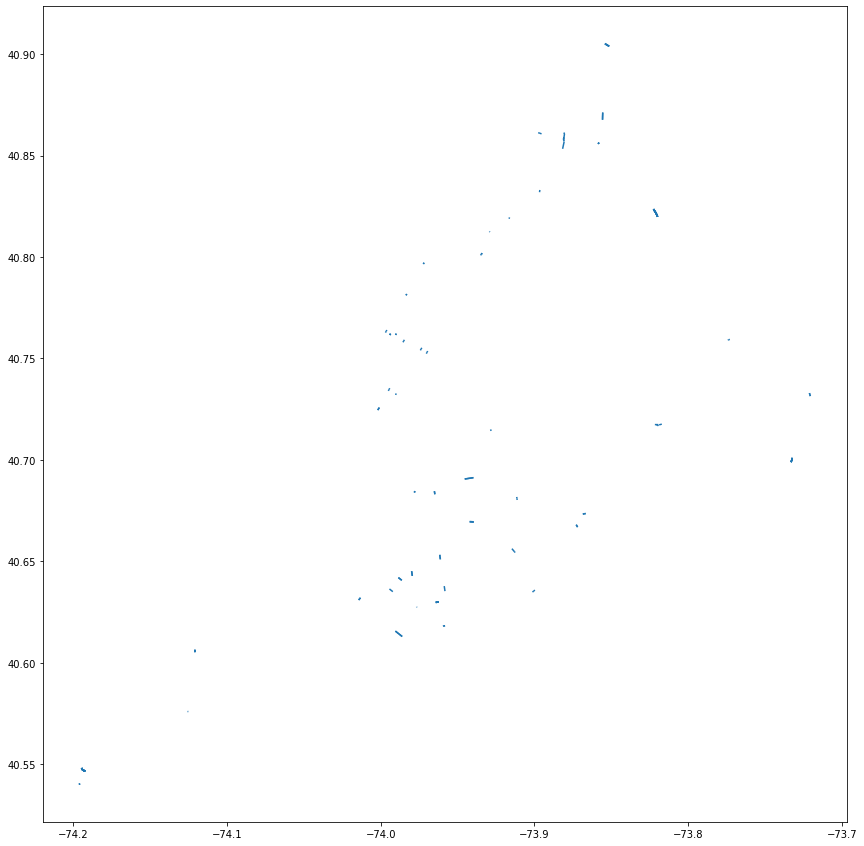

In [475]:
gdata3 = gpd.GeoDataFrame(final_df, geometry='geometry')
gdata3.plot(figsize=(30, 15))

In [510]:
final_df['ClosedIndicator'] = 1
final_df.head(3)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Roadway Name,From_x,To,Direction,Date,morning_rush,midday,afternoon_rush,evening,night,total,geometry,ClosedIndicator
0,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,1182.0,2489.0,2229.0,1486.0,711.0,8097.0,"MULTILINESTRING ((-73.87084 40.87631, -73.8707...",1
1,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,1188.0,1897.0,1444.0,1097.0,585.0,6211.0,"MULTILINESTRING ((-73.87015 40.87831, -73.8700...",1
2,71,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,739.0,1274.0,903.0,726.0,336.0,3978.0,"MULTILINESTRING ((-73.87048 40.87671, -73.8700...",1


In [512]:
test9['ClosedIndicator'] = 0

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [520]:
final_df.sort_index(inplace=True)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


In [526]:
test9['ClosedIndicator'].value_counts()

0    9237
Name: ClosedIndicator, dtype: int64

In [552]:
cond = test9.geometry.isin(final_df.geometry)
test9.drop(test9[cond].index, inplace = True)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [554]:
my_df= pd.concat([test9, final_df])
my_df

,ID,Roadway Name,From_x,To,Direction,Date,morning_rush,midday,afternoon_rush,evening,night,total,geometry,ClosedIndicator
180,221,melrose avenue,e 154 street,e 153 street,SB,2014-09-13,5853.0,6446.0,9931.0,4457.0,384.0,27071.0,"MULTILINESTRING ((-73.91650 40.81888, -73.9162...",0
181,221,melrose avenue,e 154 street,e 153 street,SB,2014-09-14,12608.0,8275.0,8029.0,2310.0,738.0,31960.0,"MULTILINESTRING ((-73.91650 40.81888, -73.9162...",0
182,221,melrose avenue,e 154 street,e 153 street,SB,2014-09-15,6583.0,7016.0,9994.0,3815.0,441.0,27849.0,"MULTILINESTRING ((-73.91650 40.81888, -73.9162...",0
183,221,melrose avenue,e 154 street,e 153 street,SB,2014-09-16,11918.0,8252.0,7919.0,2075.0,943.0,31107.0,"MULTILINESTRING ((-73.91650 40.81888, -73.9162...",0
184,221,melrose avenue,e 154 street,e 153 street,SB,2014-09-17,12928.0,12422.0,11048.0,6186.0,2052.0,44636.0,"MULTILINESTRING ((-73.91650 40.81888, -73.9162...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,128,e tremont avenue,anthony avenue,monroe avenue,WB,2014-09-17,3210.0,3270.0,3386.0,1656.0,591.0,12113.0,"MULTILINESTRING ((-73.90572 40.84929, -73.9056...",1
148,128,e tremont avenue,anthony avenue,monroe avenue,EB,2014-09-18,3210.0,3270.0,3386.0,1656.0,591.0,12113.0,"MULTILINESTRING ((-73.90580 40.84909, -73.9057...",1
149,128,e tremont avenue,anthony avenue,monroe avenue,EB,2014-09-18,1093.0,972.0,974.0,493.0,254.0,3786.0,"MULTILINESTRING ((-73.90576 40.84919, -73.9056...",1
150,128,e tremont avenue,anthony avenue,monroe avenue,EB,2014-09-18,15903.0,10634.0,10850.0,5284.0,2399.0,45070.0,"MULTILINESTRING ((-73.90573 40.84926, -73.9056...",1


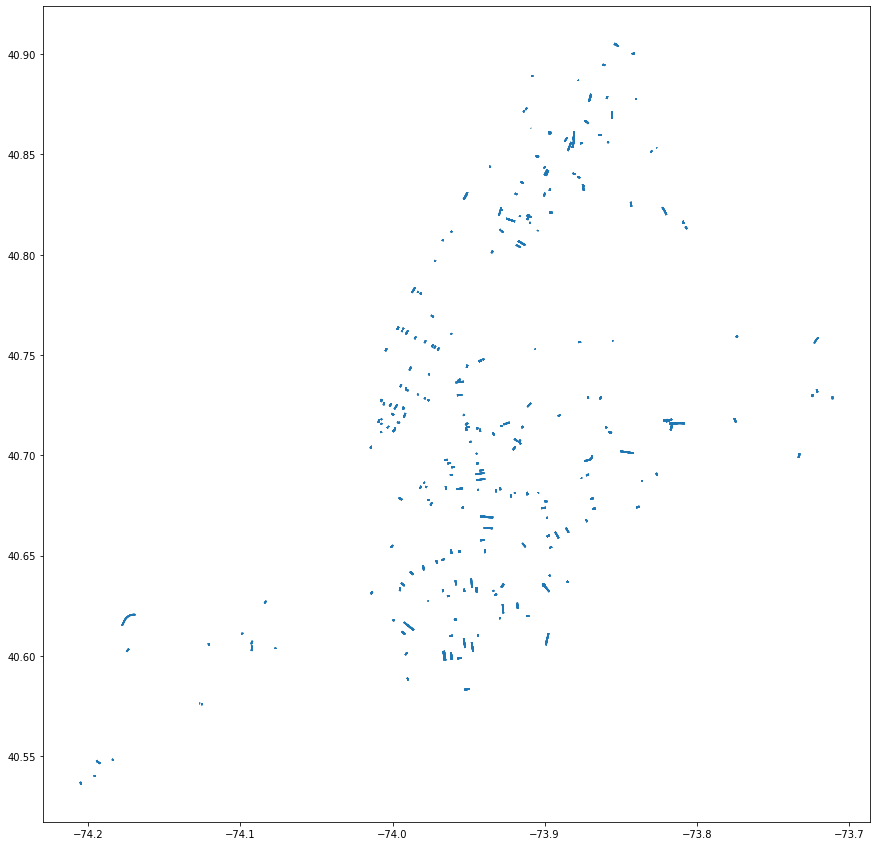

In [555]:

geo_data = gpd.GeoDataFrame(my_df, geometry='geometry')
geo_data.plot(figsize=(30, 15))